## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix, matthews_corrcoef

## Reading and Displaying CSV

In [3]:
data = pd.read_csv('diabetes.csv')
data.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Splitting into input and outcome

In [41]:
X = data.iloc[: , :-1].values
print(X.shape)
Y = data.iloc[: , -1].values
print(Y.shape)
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.40)

(768, 8)
(768,)


## Training SVM model

In [42]:
SVM = SVC(kernel = 'linear')
SVM.fit(X_train , Y_train)

SVC(kernel='linear')

## Predicting with SVM model

In [43]:
y_pred = SVM.predict(X_test)

## Confusion Matrix

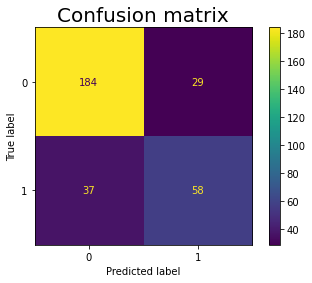

In [44]:
matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(SVM,X_test, Y_test)
plt.title("Confusion matrix",fontsize=20)
plt.show()

In [45]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       213
           1       0.67      0.61      0.64        95

    accuracy                           0.79       308
   macro avg       0.75      0.74      0.74       308
weighted avg       0.78      0.79      0.78       308



## Evaluation scores

In [46]:
matrix = confusion_matrix(Y_test, y_pred)

tp = matrix[1][1]
tn = matrix[0][0]
fp = matrix[0][1]
fn = matrix[1][0]
specificity = tn/(tn+fp)
fpr = 1-specificity
fnr = fn/(fn+tp)
npv = tn/(tn+fn)
fdr = fp/(fp+tp)
mcc=matthews_corrcoef(Y_test, y_pred)
print("specificity =",specificity)
print("fpr = ",fpr)
print("fnr = ",fnr)
print("npv = ",npv)
print("fdr = ",fdr)
print("mcc = ",mcc)

specificity = 0.863849765258216
fpr =  0.136150234741784
fnr =  0.3894736842105263
npv =  0.832579185520362
fdr =  0.3333333333333333
mcc =  0.4866521250747774


## ROC Curve

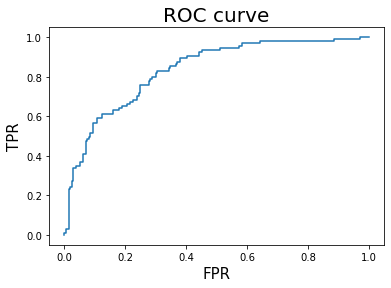

In [47]:
y_test_pred = SVM.decision_function(X_test) 
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(Y_test, y_test_pred)
plt.plot(test_fpr, test_tpr)
plt.title('ROC curve',fontsize=20)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.show()